# **Winter 2022 Data Science Intern Challenge**

**Question 1:**

**On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis**


Importing useful libraries:

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Importing the dataset from drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/2019 Winter Data Science Intern Challenge Data Set.xlsx")

Checking the dataset for Initial look

In [ ]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


Looking for Null values and all the information in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


Checking all the values from mean, std, min,max. And we can see from the below function that the std is 41282.539349 for order_amount which implies that the values vary in the dataset making the mean not a proper representation for AOV.

In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


From the boxplot below we can see outliers for order_amount and we need to check further for higher values present in it.

{'boxes': [<matplotlib.lines.Line2D at 0x7f6eec195d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6eec1b3810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6eec195e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6eec1bb310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6eec1aad50>,
  <matplotlib.lines.Line2D at 0x7f6eec1b32d0>]}

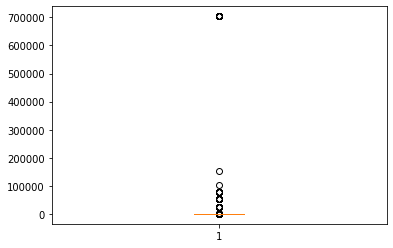

In [ ]:
plt.boxplot(df["order_amount"])

Sorting the values in the dataset based on order_amount to check the first 10 elements(trying to get some information to determine what is wrong)

In [ ]:
df.sort_values("order_amount", ascending= False)[:10]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00


Here we are using groupby to group by order_amount to check the values of order_amount and we can identify that there is a sudden change over the values 1760 to 25725.

In [ ]:
df.groupby("order_amount").count().reset_index().sort_values("order_amount", ascending= False)[:10]

,order_amount,order_id,shop_id,user_id,total_items,payment_method,created_at
257,704000,17,17,17,17,17,17
256,154350,1,1,1,1,1,1
255,102900,1,1,1,1,1,1
254,77175,9,9,9,9,9,9
253,51450,16,16,16,16,16,16
252,25725,19,19,19,19,19,19
251,1760,1,1,1,1,1,1
250,1408,2,2,2,2,2,2
249,1086,1,1,1,1,1,1
248,1064,1,1,1,1,1,1


checking all the orders based on shop_id '78' to check if all has the same amount. But it varies from the below execution.

In [ ]:
df[df['shop_id']==78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400
511,512,78,967,51450,2,cash,2017-03-09 07:23:13.640
617,618,78,760,51450,2,cash,2017-03-18 11:18:41.848
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:19.843


From the below execution we can predict that the cost of the particular item with order_amount 25725 is expensive unlike remaining orders. The total_items are also more along with the order_amount for all the remaining orders.

In [ ]:
df[df['order_amount']==25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06.279
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:42.551
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54.089
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:21.635
2548,2549,78,861,25725,1,cash,2017-03-17 19:35:59.663
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43.445


In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


order_id        2500.5
shop_id           50.0
user_id          849.0
order_amount     284.0
total_items        2.0
dtype: float64

**QUESTION 1 Solutions:**

**[1] Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**


We have been using mean to calculate AOV. We can see many outliers in the plot which may lead to the unusual AOV. we should use a metric that should be satisfying and should not be affected by outliers.

**[2] What metric would you report for this dataset?**


Using Median as Metric would be the best option because it is generated based on more occuring data and hence the outliers impact is nullified for the vigorously varying data. Calculating on basis of median average would be the best thing to do.

**[3] What is its value?**


The value of Median or Median Average is 284.0

**QUESTION 2 Solutions:**

**Question 2: For this question you’ll need to use SQL. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.**


**[1]  How many orders were shipped by Speedy Express in total?**

SELECT count(*) FROM Orders where shipperid='1'

**Output:** 54


**[2]  What is the last name of the employee with the most orders?**


SELECT LastName FROM [Employees] where EmployeeID in (SELECT EmployeeID FROM  Orders GROUP BY EmployeeID ORDER BY COUNT(*) DESC LIMIT 1)

**Output:** Peacock

**[3]  What product was ordered the most by customers in Germany?**


SELECT Productname FROM Products where ProductID in(Select ProductID from OrderDetails where OrderID in (SELECT orderid FROM Orders 
where CustomerID in (select CustomerID from Customers 
where Country='Germany')) Group by ProductID 
Order by Count(*) Desc limit 1)

**Output:** Gorgonzola Telino